In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N=500
X = np.random.randn(N,2)
h = 1.0
N=X.shape[0]
X.shape

(500, 2)

In [ ]:
x,y = np.meshgrid(np.arange(-3,3.1,0.1), np.arange(-3,3.1,0.1))

x.shape, y.shape

((61, 61), (61, 61))

# Parzen window

In [ ]:
k = np.zeros((61,61))
print(k)

for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    k[i,j] = 0
    for n in range(N):
      if np.abs(X[n,0] - x[i,j]) < h/2 and np.abs(X[n,1]-y[i,j]) <h/2:
        k[i,j] = k[i,j] + 1

pxyp = k/(h**2*N)

pxyp.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(61, 61)

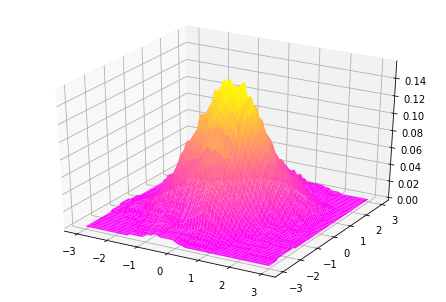

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,pxyp, rstride=1, cstride=1, cmap='spring')

plt.show()

# Gaussian Kernel

In [ ]:
from typing import NamedTuple
txy = np.zeros((1, 2))
k = np.zeros((61, 61))
ksum = []

for i in range(x.shape[0]):
  for j in range(y.shape[1]):
    txy = np.array([x[i,j], y[i,j]]) #대괄호로 하나더 묶어 줘야 행렬이된다 안묵으면 그냥 리스트 나래비?
    ksum = []
    for n in range(N):
      ksum = np.append(ksum, np.exp(-(X[n,:]-txy) @ (X[n,:]-txy).T / (2*h**2)) / (2*np.pi))
    k[i,j] = sum(ksum)

ksum.shape

(500,)

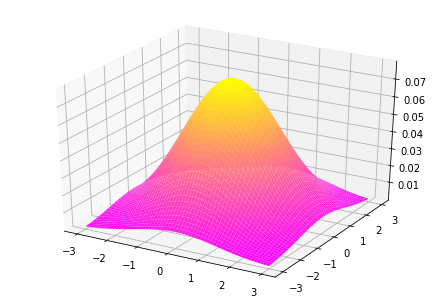

In [ ]:
pxyg = k/(h**2*N)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,pxyg, rstride=1, cstride=1, cmap ='spring')

plt.show()